In [38]:
# Full name, starting with your LASTNAME and then your FIRSTNAME(s)
name = "Balaji Singh, Shrikanth Singh"

# Matriculation Number
number = "87683"

# Email address which you used on PIAZZA (or your @gw.uni-passau.de address)
email = "balaji01@gw.uni-passau.de"

In [39]:
#Each class belongs to exactly one classifier and that class has to be inspected, this kind of approach is most common in multi label classifier. Hence I used OneVsRestClassifier from sklearn.

#In order to evalute the designed classifier we need the metrics and hence coressponding header files are imported.

#I have used Support vector machine classification technique for the following reasons:-
#In addition to performing linear classification, SVMs can efficiently perform a non-linear classification using what is called the kernel trick, implicitly mapping their inputs into high-dimensional feature spaces.
#SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier.
#SVM being supervised model converges at the solution at a much fater rate and is robust when compared to other classifiers.

In [32]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score


In [ ]:
#Importing of reuters corpus.

#Word tokenisation - The process of segmenting running text into words and sentences. 
#Import word tokenizer function from nltk library.

#Stop words - stopwords, that is, high-frequency words like the, to and also that we sometimes want to filter out of a document before further processing. 
#Stopwords usually have little lexical content, and their presence in a text fails to distinguish it from other texts.
#Import stopwords function from nltk corpus.

#Porter stemmer
#Stemming algorithms attempt to automatically remove suffixes (and in somecases prefixes) in order to find the "root word" or stem of a given word. 
#This is useful in various natural language processing scenarios, such as search.

#TF IDF import - Convert a collection of raw documents to a matrix of TF-IDF features.

#Multi label binarizer is used to create a label indicator matrix from a list of multi-class labels.

In [33]:
import re
from nltk import word_tokenize
from nltk.corpus import reuters
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer

In [34]:
cachedStopWords = stopwords.words("english")

In [35]:
def tokenize(text):
    min_length = 3
    words = map(lambda word: word.lower(), word_tokenize(text))
    words = [word for word in words if word not in cachedStopWords]
    tokens = (list(map(lambda token: PorterStemmer().stem(token), words)))
    p = re.compile('[a-zA-Z]+')
    filtered_tokens = list(filter(lambda token: p.match(token) and
                                  len(token) >= min_length, tokens))
    return filtered_tokens


In [ ]:
#TF IDF parameters - 
#min_df=3. When building the vocabulary ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words).
#max_df=0.90. When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold.
# max_features=1000. A vocabulary that only consider the top max_features of 1000 ordered by term frequency across the corpus.
#use_idf=True. Enable inverse-document-frequency reweighting

In [36]:
def tf_idf(docs):
    tfidf = TfidfVectorizer(tokenizer=tokenize, min_df=3, max_df=0.90,
                            max_features=5000, use_idf=True, sublinear_tf=True)
    tfidf.fit(docs)
    return tfidf

In [ ]:
#Create lists for train and test documents.
#Create lists for train and test documents.

In [37]:
train_docs = []
train_cats = []
test_docs = []
test_cats = []

cats = reuters.categories()

In [ ]:
#Classify the docs in reuters corpus into test and train data.
#If doc id starts with train then classify the doc as train set else append it as test set.
#Since our goal is to use the train set from the reuters data the code "representer = tf_idf(train_docs)" is used.
#The TF IDF parameters are printed below for reference

In [38]:
for doc_id in reuters.fileids():
    if doc_id.startswith("train"):
        train_docs.append(reuters.raw(doc_id))
        train_cats.append(
            [cats.index(cat) for cat in reuters.categories(doc_id)])
    else:
        test_docs.append(reuters.raw(doc_id))
        test_cats.append(
            [cats.index(cat) for cat in reuters.categories(doc_id)])
representer = tf_idf(train_docs)


In [39]:
def get_train_set():
    return representer.transform(train_docs),\
        MultiLabelBinarizer().fit_transform(train_cats)


def get_validation_set():
    return 0


def get_test_set():
    return representer.transform(test_docs),\
        MultiLabelBinarizer().fit_transform(test_cats)

In [ ]:
#Evaluation phase:-
#Accuracy - Ratio Number of true predictions to total number of predictions.
#Acc = (TP+TN)/(TP+TN+FP+FN)
#Precision - Percentage of selected are correct.
#P = TP/(TP+FP)
#Recall - Percenatge of correct are selected.
#R = TP/(TP+FN)
#F score - Trade off between Precision and Recall. Usually we use F1 balanced score.
#F= 2PR/(P+R)

#Averaging Techniques:
#Macro averaging - Performance measure for each classifier is done and then averaged out.
#Micro averaging - The contigency table is formulated for the total number of classifers and then we do performance measures.


In [40]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_fscore_support
from nltk.corpus import reuters
from sklearn.metrics import accuracy_score
X_train, Y_train = get_train_set()
X_test, Y_test = get_test_set()
#clfs = OrderedDict()

classif = OneVsRestClassifier(SVC(kernel='linear'))
classif.fit(X_train, Y_train)
Y_test_predict = classif.predict(X_test)
[precision, recall, F1, support] = \
    precision_recall_fscore_support(Y_test, Y_test_predict, average='micro')
accuracy = accuracy_score(Y_test, Y_test_predict)
print("Micro averaging approach")
print("Accuracy : {:.4f}".format(metrics.accuracy_score(Y_test, Y_test_predict)))
print("Precision: {:.4f}".format(metrics.precision_score(Y_test, Y_test_predict, average='micro')))
print("Recall   : {:.4f}".format(metrics.recall_score(Y_test, Y_test_predict, average='micro')))
print("F1-Score : {:.4f}".format(metrics.f1_score(Y_test, Y_test_predict, average='micro')))
print("Macro averaging approach")
[precision, recall, F1, support] = \
    precision_recall_fscore_support(Y_test, Y_test_predict, average='macro')
accuracy = accuracy_score(Y_test, Y_test_predict)
print("Accuracy : {:.4f}".format(metrics.accuracy_score(Y_test, Y_test_predict)))
print("Precision: {:.4f}".format(metrics.precision_score(Y_test, Y_test_predict, average='macro')))
print("Recall   : {:.4f}".format(metrics.recall_score(Y_test, Y_test_predict, average='macro')))
print("F1-Score : {:.4f}".format(metrics.f1_score(Y_test, Y_test_predict, average='macro')))
print("Sampling approach")
[precision, recall, F1, support] = \
    precision_recall_fscore_support(Y_test, Y_test_predict, average='samples')
accuracy = accuracy_score(Y_test, Y_test_predict)
print("Accuracy : {:.4f}".format(metrics.accuracy_score(Y_test, Y_test_predict)))
print("Precision: {:.4f}".format(metrics.precision_score(Y_test, Y_test_predict, average='samples')))
print("Recall   : {:.4f}".format(metrics.recall_score(Y_test, Y_test_predict, average='samples')))
print("F1-Score : {:.4f}".format(metrics.f1_score(Y_test, Y_test_predict, average='samples')))

Micro averaging approach
Accuracy : 0.8049
Precision: 0.9426
Recall   : 0.7983
F1-Score : 0.8645
Macro averaging approach
Accuracy : 0.8049
Precision: 0.5436
Recall   : 0.3439
F1-Score : 0.4042
Sampling approach


C:\Users\shrikanth\Anaconda3\anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\shrikanth\Anaconda3\anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\shrikanth\Anaconda3\anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\shrikanth\Anaconda3\anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predict

Accuracy : 0.8049
Precision: 0.8790
Recall   : 0.8631
F1-Score : 0.8624


C:\Users\shrikanth\Anaconda3\anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)
C:\Users\shrikanth\Anaconda3\anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


In [ ]:
#From the above metrics it is clear that micro averaging approach gives better precision and recall than macro averaging. 
#This shows that the classifier gives more emphasis on the freqent or common words therefore the micro average is dominated by the macro technique.
#Thus the inference is the classifier will work well on large copus like Reuters but would result in lower performance when used for a smaller corpus with lesser common words.

In [41]:
all_categories = sorted(list(set(reuters.categories())))
#after training our classifier, we do the prediction with test data set for all the catagories  
  

In [42]:
from sklearn import metrics

In [43]:
#print the evaluation report of all the catagories
print(metrics.classification_report(y_true=Y_test, y_pred=Y_test_predict, target_names=all_categories))

                 precision    recall  f1-score   support

            acq       0.98      0.96      0.97       719
           alum       1.00      0.43      0.61        23
         barley       1.00      0.64      0.78        14
            bop       1.00      0.50      0.67        30
        carcass       0.86      0.33      0.48        18
     castor-oil       0.00      0.00      0.00         1
          cocoa       1.00      1.00      1.00        18
        coconut       0.00      0.00      0.00         2
    coconut-oil       0.00      0.00      0.00         3
         coffee       0.93      0.96      0.95        28
         copper       1.00      0.83      0.91        18
     copra-cake       0.00      0.00      0.00         1
           corn       0.94      0.82      0.88        56
         cotton       1.00      0.55      0.71        20
     cotton-oil       0.00      0.00      0.00         2
            cpi       1.00      0.39      0.56        28
            cpu       0.00    

C:\Users\shrikanth\Anaconda3\anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [44]:

import numpy as np
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    print(cm)
    plt.figure(num=None, figsize=(80, 25), dpi=100, facecolor='w', edgecolor='k')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    # Setup labels 
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout() 
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

In [ ]:
# ConfusionMatrix = confusion_matrix(y_true=Y_test, y_pred=y_pred)
# print(ConfusionMatrix)


[[0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]]


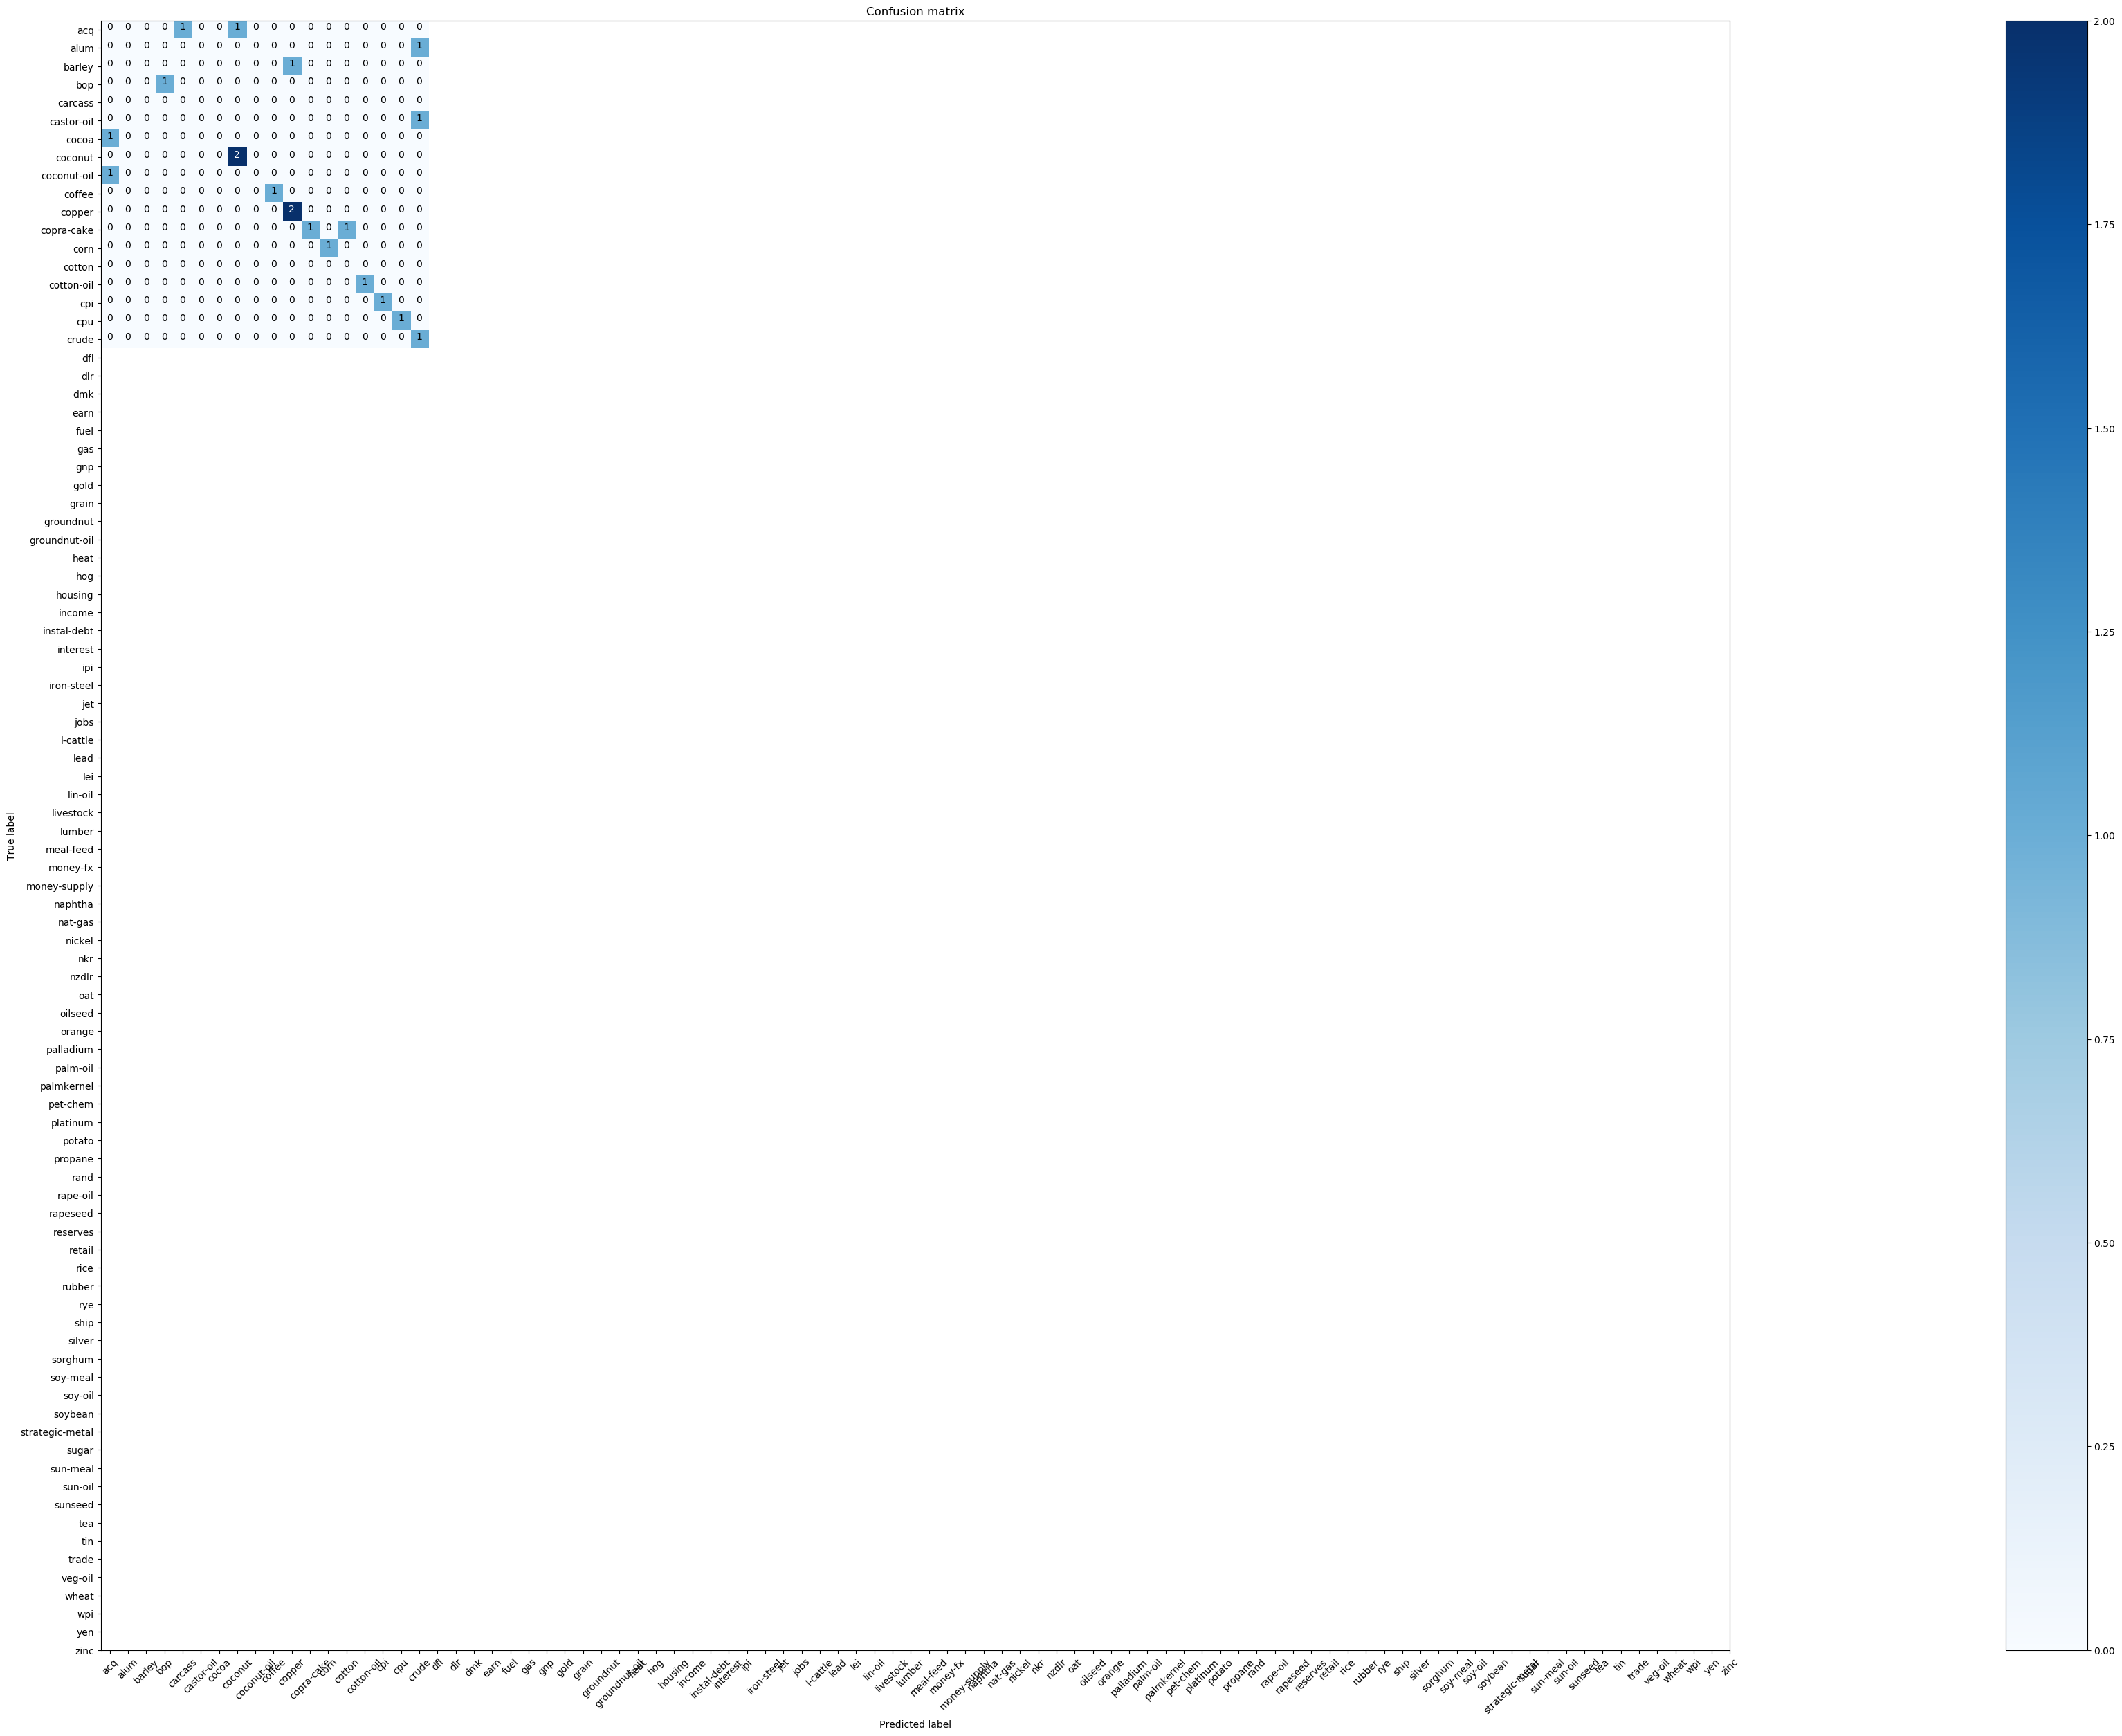

In [45]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
ConfusionMatrix = confusion_matrix(Y_test.argmax(axis=1)[:20], Y_test_predict.argmax(axis=1)[:20])

plot_confusion_matrix(ConfusionMatrix, classes=all_categories, title='Confusion matrix')
plt.show()
